In [249]:
import numpy as np

In [251]:
import pandas as pd

In [252]:
import random

In [253]:
import matplotlib.pyplot as plt

In [254]:
import seaborn as sns

In [255]:
from __future__ import print_function

In [256]:
from sklearn.neighbors import KNeighborsClassifier

In [257]:
from sklearn import metrics

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
from sklearn.model_selection import cross_val_score

In [260]:
from sklearn.model_selection import GridSearchCV

In [261]:
from sklearn.linear_model import LogisticRegression

In [262]:
from sklearn.model_selection import train_test_split

In [263]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

In [264]:
from sklearn.metrics import confusion_matrix

In [403]:
from sklearn.metrics import classification_report

In [265]:
from sklearn.preprocessing import StandardScaler

In [266]:
from sklearn.tree import DecisionTreeClassifier

In [267]:
from sklearn.ensemble import RandomForestClassifier

In [268]:
%config InlineBackend.figure_format = 'svg'

In [269]:
%matplotlib inline 

In [270]:
df = pd.read_csv('bodyPerformance.csv')

In [271]:
df.head(20)

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0   27.0      M      172.3      75.24        21.3       80.0     130.0   
1   25.0      M      165.0      55.80        15.7       77.0     126.0   
2   31.0      M      179.6      78.00        20.1       92.0     152.0   
3   32.0      M      174.5      71.10        18.4       76.0     147.0   
4   28.0      M      173.8      67.70        17.1       70.0     127.0   
5   36.0      F      165.4      55.40        22.0       64.0     119.0   
6   42.0      F      164.5      63.70        32.2       72.0     135.0   
7   33.0      M      174.9      77.20        36.9       84.0     137.0   
8   54.0      M      166.8      67.50        27.6       85.0     165.0   
9   28.0      M      185.0      84.60        14.4       81.0     156.0   
10  42.0      M      169.2      65.40        19.3       63.0     110.0   
11  57.0      F      153.0      49.00        20.9       69.0     106.0   
12  27.0      F      156.0      53.90        35.5       69.0     116.0   
13  22.0      M      175.7      67.90        11.3       71.0     103.0   
14  24.0      M      181.0      84.40        20.4       80.0     120.0   
15  45.0      F      159.0      63.10        30.9       93.0     144.0   
16  25.0      F      164.2      66.60        30.2       82.0     120.0   
17  26.0      M      179.9      71.50         9.7       64.0     135.0   
18  26.0      M      169.2      70.60        21.0       63.0     129.0   
19  21.0      F      162.7      47.20        18.9       78.0     133.0   

    gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0        54.9                     18.4            60.0          217.0     C  
1        36.4                     16.3            53.0          229.0     A  
2        44.8                     12.0            49.0          181.0     C  
3        41.4                     15.2            53.0          219.0     B  
4        43.5                     27.1            45.0          217.0     B  
5        23.8                     21.0            27.0          153.0     B  
6        22.7                      0.8            18.0          146.0     D  
7        45.9                     12.3            42.0          234.0     B  
8        40.4                     18.6            34.0          148.0     C  
9        57.9                     12.1            55.0          213.0     B  
10       43.5                     16.0            68.0          211.0     A  
11       21.5                     30.0             0.0           90.0     D  
12       23.1                     13.1            28.0          144.0     C  
13       52.5                     19.2            55.0          232.0     C  
14       48.9                      7.2            54.0          213.0     C  
15       34.1                     19.0            30.0          155.0     A  
16       25.7                     22.9            39.0          178.0     C  
17       59.6                     17.8            61.0          239.0     A  
18       41.3                     15.1            53.0          225.0     B  
19       25.4                     20.5            36.0          137.0     B

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [273]:
df.shape

(13393, 12)

In [274]:
df.isna()

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      False   False      False      False       False      False     False   
1      False   False      False      False       False      False     False   
2      False   False      False      False       False      False     False   
3      False   False      False      False       False      False     False   
4      False   False      False      False       False      False     False   
...      ...     ...        ...        ...         ...        ...       ...   
13388  False   False      False      False       False      False     False   
13389  False   False      False      False       False      False     False   
13390  False   False      False      False       False      False     False   
13391  False   False      False      False       False      False     False   
13392  False   False      False      False       False      False     False   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  \
0          False                    False           False          False   
1          False                    False           False          False   
2          False                    False           False          False   
3          False                    False           False          False   
4          False                    False           False          False   
...          ...                      ...             ...            ...   
13388      False                    False           False          False   
13389      False                    False           False          False   
13390      False                    False           False          False   
13391      False                    False           False          False   
13392      False                    False           False          False   

       class  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
13388  False  
13389  False  
13390  False  
13391  False  
13392  False  

[13393 rows x 12 columns]

In [275]:
df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [276]:
df.rename(columns={'height_cm':'height',
                   'weight_kg':'weight',
                   'body fat_%':'bodyFat',
                   'sit and bend forward_cm':'SABF',
                   'sit-ups counts': 'SUC',
                   'broad jump_cm':'broadJump'},inplace=True)

In [277]:
df.dtypes

age          float64
gender        object
height       float64
weight       float64
bodyFat      float64
diastolic    float64
systolic     float64
gripForce    float64
SABF         float64
SUC          float64
broadJump    float64
class         object
dtype: object

In [278]:
df.head()

age gender  height  weight  bodyFat  diastolic  systolic  gripForce  SABF  \
0  27.0      M   172.3   75.24     21.3       80.0     130.0       54.9  18.4   
1  25.0      M   165.0   55.80     15.7       77.0     126.0       36.4  16.3   
2  31.0      M   179.6   78.00     20.1       92.0     152.0       44.8  12.0   
3  32.0      M   174.5   71.10     18.4       76.0     147.0       41.4  15.2   
4  28.0      M   173.8   67.70     17.1       70.0     127.0       43.5  27.1   

    SUC  broadJump class  
0  60.0      217.0     C  
1  53.0      229.0     A  
2  49.0      181.0     C  
3  53.0      219.0     B  
4  45.0      217.0     B

In [279]:
df['class'].unique()

array(['C', 'A', 'B', 'D'], dtype=object)

In [280]:
df['class'] = df['class'].str.strip()
df['class'].unique()

array(['C', 'A', 'B', 'D'], dtype=object)

In [281]:
df['gender'] = df['gender'].str.strip()
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [282]:
df['gender'] = df['gender'].str.replace(('M'),('0'))
df['gender'] = df['gender'].str.replace(('F'),('1'))

In [283]:
df['gender']

0        0
1        0
2        0
3        0
4        0
        ..
13388    0
13389    0
13390    0
13391    1
13392    0
Name: gender, Length: 13393, dtype: object

In [284]:
df['gender'] = df['gender'].astype('int')

In [285]:
df['class'] = df['class'].str.replace(('D'),('0'))
df['class'] = df['class'].str.replace(('C'),('1'))
df['class'] = df['class'].str.replace(('B'),('2'))
df['class'] = df['class'].str.replace(('A'),('3'))


In [286]:
df['class']

0        1
1        3
2        1
3        2
4        2
        ..
13388    1
13389    0
13390    3
13391    0
13392    1
Name: class, Length: 13393, dtype: object

In [287]:
df['class'] = df['class'].astype('int')

In [288]:
df.dtypes

age          float64
gender         int32
height       float64
weight       float64
bodyFat      float64
diastolic    float64
systolic     float64
gripForce    float64
SABF         float64
SUC          float64
broadJump    float64
class          int32
dtype: object

In [289]:
df.describe()

age        gender        height        weight       bodyFat  \
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
mean      36.775106      0.367804    168.559807     67.447316     23.240165   
std       13.625639      0.482226      8.426583     11.949666      7.256844   
min       21.000000      0.000000    125.000000     26.300000      3.000000   
25%       25.000000      0.000000    162.400000     58.200000     18.000000   
50%       32.000000      0.000000    169.200000     67.400000     22.800000   
75%       48.000000      1.000000    174.800000     75.300000     28.000000   
max       64.000000      1.000000    193.800000    138.100000     78.400000   

          diastolic      systolic     gripForce          SABF           SUC  \
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
mean      78.796842    130.234817     36.963877     15.209268     39.771224   
std       10.742033     14.713954     10.624864      8.456677     14.276698   
min        0.000000      0.000000      0.000000    -25.000000      0.000000   
25%       71.000000    120.000000     27.500000     10.900000     30.000000   
50%       79.000000    130.000000     37.900000     16.200000     41.000000   
75%       86.000000    141.000000     45.200000     20.700000     50.000000   
max      156.200000    201.000000     70.500000    213.000000     80.000000   

          broadJump         class  
count  13393.000000  13393.000000  
mean     190.129627      1.499813  
std       39.868000      1.118109  
min        0.000000      0.000000  
25%      162.000000      0.000000  
50%      193.000000      1.000000  
75%      221.000000      2.000000  
max      303.000000      3.000000

<AxesSubplot:>

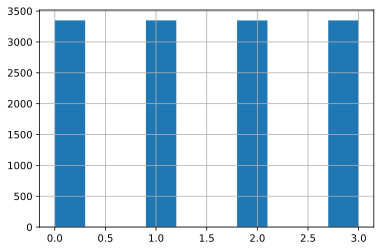

In [290]:
df['class'].hist()

<AxesSubplot:>

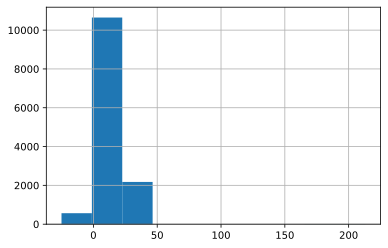

In [291]:
df['SABF'].hist()

In [292]:
df.describe()

age        gender        height        weight       bodyFat  \
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
mean      36.775106      0.367804    168.559807     67.447316     23.240165   
std       13.625639      0.482226      8.426583     11.949666      7.256844   
min       21.000000      0.000000    125.000000     26.300000      3.000000   
25%       25.000000      0.000000    162.400000     58.200000     18.000000   
50%       32.000000      0.000000    169.200000     67.400000     22.800000   
75%       48.000000      1.000000    174.800000     75.300000     28.000000   
max       64.000000      1.000000    193.800000    138.100000     78.400000   

          diastolic      systolic     gripForce          SABF           SUC  \
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
mean      78.796842    130.234817     36.963877     15.209268     39.771224   
std       10.742033     14.713954     10.624864      8.456677     14.276698   
min        0.000000      0.000000      0.000000    -25.000000      0.000000   
25%       71.000000    120.000000     27.500000     10.900000     30.000000   
50%       79.000000    130.000000     37.900000     16.200000     41.000000   
75%       86.000000    141.000000     45.200000     20.700000     50.000000   
max      156.200000    201.000000     70.500000    213.000000     80.000000   

          broadJump         class  
count  13393.000000  13393.000000  
mean     190.129627      1.499813  
std       39.868000      1.118109  
min        0.000000      0.000000  
25%      162.000000      0.000000  
50%      193.000000      1.000000  
75%      221.000000      2.000000  
max      303.000000      3.000000

In [293]:
print(df['SABF']==1)

0        False
1        False
2        False
3        False
4        False
         ...  
13388    False
13389    False
13390    False
13391    False
13392    False
Name: SABF, Length: 13393, dtype: bool


In [294]:
df.head(20)

age  gender  height  weight  bodyFat  diastolic  systolic  gripForce  \
0   27.0       0   172.3   75.24     21.3       80.0     130.0       54.9   
1   25.0       0   165.0   55.80     15.7       77.0     126.0       36.4   
2   31.0       0   179.6   78.00     20.1       92.0     152.0       44.8   
3   32.0       0   174.5   71.10     18.4       76.0     147.0       41.4   
4   28.0       0   173.8   67.70     17.1       70.0     127.0       43.5   
5   36.0       1   165.4   55.40     22.0       64.0     119.0       23.8   
6   42.0       1   164.5   63.70     32.2       72.0     135.0       22.7   
7   33.0       0   174.9   77.20     36.9       84.0     137.0       45.9   
8   54.0       0   166.8   67.50     27.6       85.0     165.0       40.4   
9   28.0       0   185.0   84.60     14.4       81.0     156.0       57.9   
10  42.0       0   169.2   65.40     19.3       63.0     110.0       43.5   
11  57.0       1   153.0   49.00     20.9       69.0     106.0       21.5   
12  27.0       1   156.0   53.90     35.5       69.0     116.0       23.1   
13  22.0       0   175.7   67.90     11.3       71.0     103.0       52.5   
14  24.0       0   181.0   84.40     20.4       80.0     120.0       48.9   
15  45.0       1   159.0   63.10     30.9       93.0     144.0       34.1   
16  25.0       1   164.2   66.60     30.2       82.0     120.0       25.7   
17  26.0       0   179.9   71.50      9.7       64.0     135.0       59.6   
18  26.0       0   169.2   70.60     21.0       63.0     129.0       41.3   
19  21.0       1   162.7   47.20     18.9       78.0     133.0       25.4   

    SABF   SUC  broadJump  class  
0   18.4  60.0      217.0      1  
1   16.3  53.0      229.0      3  
2   12.0  49.0      181.0      1  
3   15.2  53.0      219.0      2  
4   27.1  45.0      217.0      2  
5   21.0  27.0      153.0      2  
6    0.8  18.0      146.0      0  
7   12.3  42.0      234.0      2  
8   18.6  34.0      148.0      1  
9   12.1  55.0      213.0      2  
10  16.0  68.0      211.0      3  
11  30.0   0.0       90.0      0  
12  13.1  28.0      144.0      1  
13  19.2  55.0      232.0      1  
14   7.2  54.0      213.0      1  
15  19.0  30.0      155.0      3  
16  22.9  39.0      178.0      1  
17  17.8  61.0      239.0      3  
18  15.1  53.0      225.0      2  
19  20.5  36.0      137.0      2

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

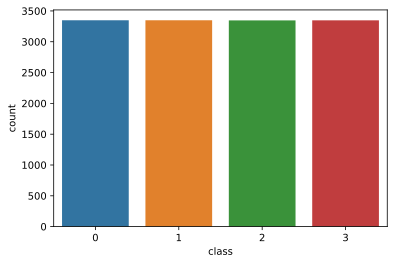

In [295]:
sns.countplot('class', data=df)

In [296]:
df['class']

0        1
1        3
2        1
3        2
4        2
        ..
13388    1
13389    0
13390    3
13391    0
13392    1
Name: class, Length: 13393, dtype: int32

<AxesSubplot:xlabel='class', ylabel='count'>

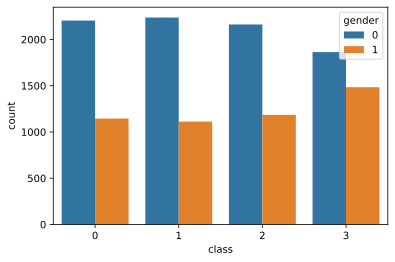

In [297]:
sns.countplot(x='class', hue='gender', data = df)

<AxesSubplot:xlabel='class', ylabel='count'>

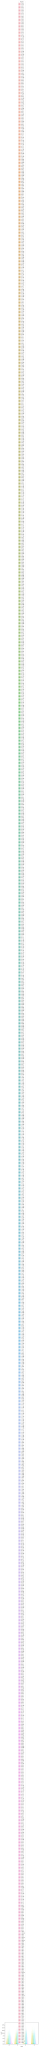

In [298]:
sns.countplot(x='class', hue='weight', data = df)

<AxesSubplot:xlabel='class', ylabel='count'>

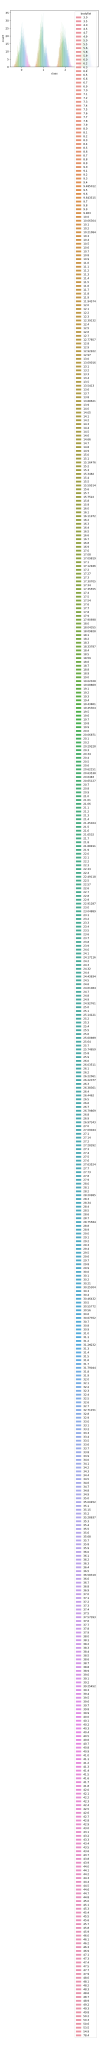

In [299]:
sns.countplot(x='class', hue='bodyFat', data = df)

<AxesSubplot:xlabel='bodyFat', ylabel='count'>

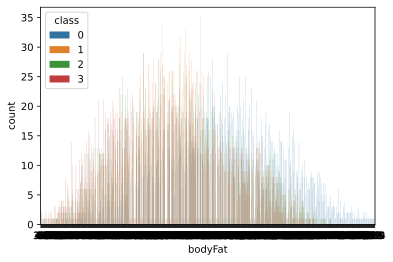

In [300]:
sns.countplot(x='bodyFat', hue='class', data = df)

<AxesSubplot:xlabel='class', ylabel='count'>

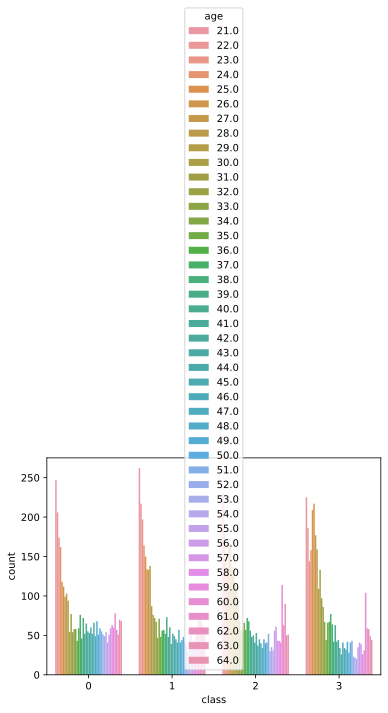

In [301]:
sns.countplot(x='class', hue='age', data = df)

<AxesSubplot:xlabel='age', ylabel='count'>

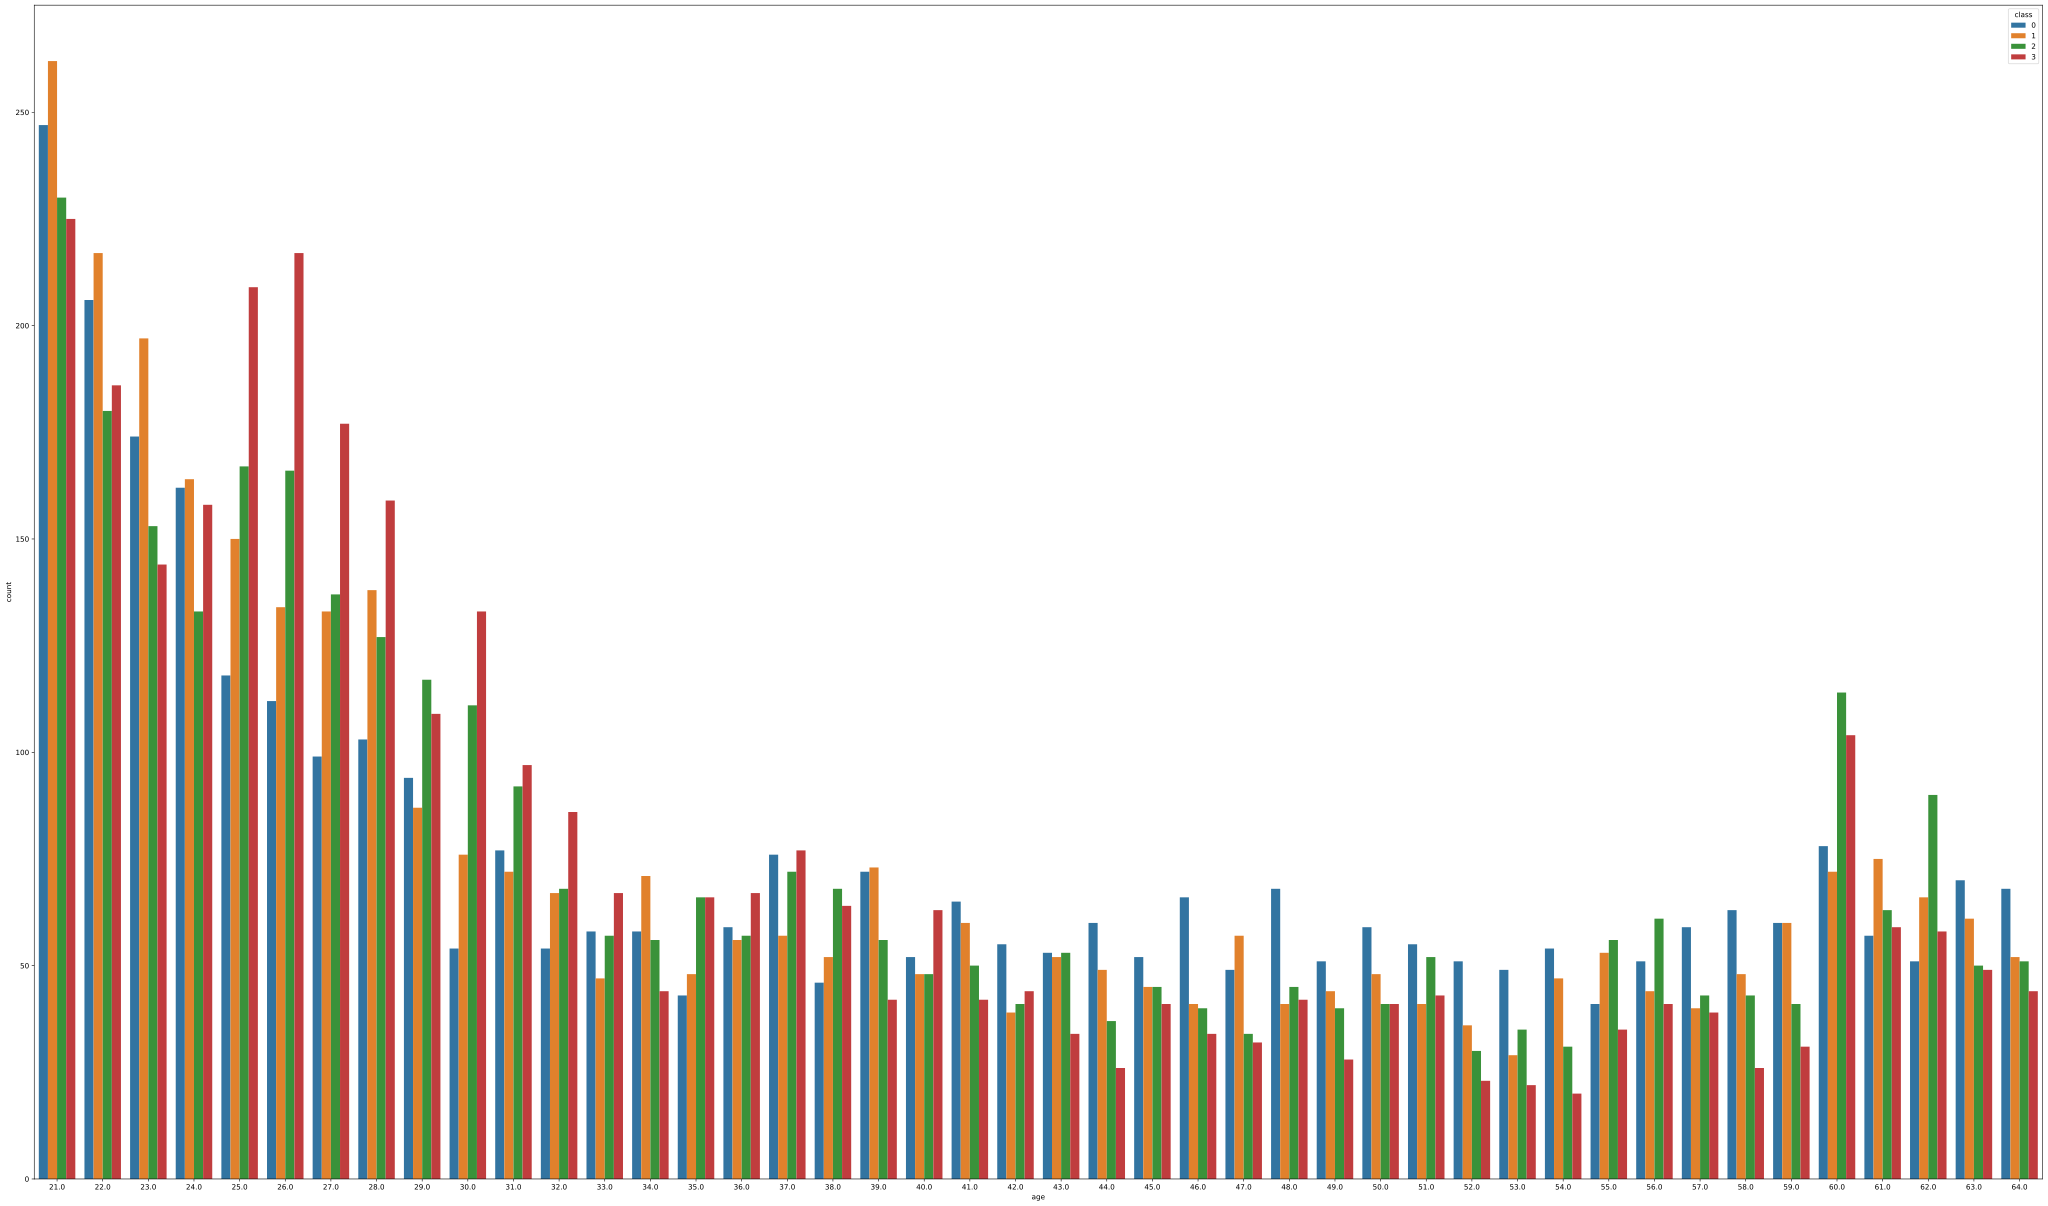

In [302]:
plt.figure(figsize=[50,30])
sns.countplot(x='age', hue='class', data = df)

<AxesSubplot:xlabel='age', ylabel='Count'>

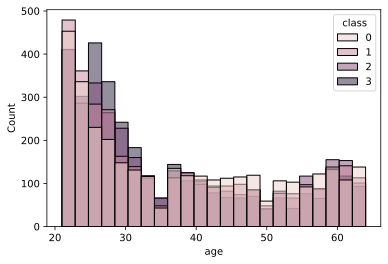

In [303]:
sns.histplot(x=df['age'], hue='class', data = df)

In [ ]:
sns.pairplot(df, diag_kind='kde', hue='class')

In [304]:
plt.show()

In [306]:
x = df.drop('class', axis=1)
x

age  gender  height  weight  bodyFat  diastolic  systolic  gripForce  \
0      27.0       0   172.3   75.24     21.3       80.0     130.0       54.9   
1      25.0       0   165.0   55.80     15.7       77.0     126.0       36.4   
2      31.0       0   179.6   78.00     20.1       92.0     152.0       44.8   
3      32.0       0   174.5   71.10     18.4       76.0     147.0       41.4   
4      28.0       0   173.8   67.70     17.1       70.0     127.0       43.5   
...     ...     ...     ...     ...      ...        ...       ...        ...   
13388  25.0       0   172.1   71.80     16.2       74.0     141.0       35.8   
13389  21.0       0   179.7   63.90     12.1       74.0     128.0       33.0   
13390  39.0       0   177.2   80.50     20.1       78.0     132.0       63.5   
13391  64.0       1   146.1   57.70     40.4       68.0     121.0       19.3   
13392  34.0       0   164.0   66.10     19.5       82.0     150.0       35.9   

       SABF   SUC  broadJump  
0      18.4  60.0      217.0  
1      16.3  53.0      229.0  
2      12.0  49.0      181.0  
3      15.2  53.0      219.0  
4      27.1  45.0      217.0  
...     ...   ...        ...  
13388  17.4  47.0      198.0  
13389   1.1  48.0      167.0  
13390  16.4  45.0      229.0  
13391   9.2   0.0       75.0  
13392   7.1  51.0      180.0  

[13393 rows x 11 columns]

In [307]:
y = df['class']
y

0        1
1        3
2        1
3        2
4        2
        ..
13388    1
13389    0
13390    3
13391    0
13392    1
Name: class, Length: 13393, dtype: int32

In [308]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [309]:
print(X_train.shape)
print(X_test.shape)

(10714, 11)
(2679, 11)


In [310]:
print(y_train.shape)
print(y_test.shape)

(10714,)
(2679,)


In [370]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [391]:
X_train_scaled

array([[-7.21992985e-01, -7.66788772e-01,  6.25421007e-01, ...,
         8.68582288e-01,  7.21783770e-01, -2.49036685e-02],
       [-1.08833033e+00,  1.30414012e+00, -9.23589813e-01, ...,
         2.02639358e+00, -3.31966375e-01, -1.18071006e+00],
       [ 8.89891333e-01,  1.30414012e+00, -2.20063690e+00, ...,
         4.74687724e-01, -2.22871663e+00, -1.05507893e+00],
       ...,
       [-7.21992985e-01,  1.30414012e+00, -1.27802713e-03, ...,
         7.37284100e-01,  5.11033741e-01, -2.00787249e-01],
       [-1.16159780e+00,  1.30414012e+00,  1.16967074e-01, ...,
         6.05985912e-01,  2.30033702e-01, -6.02806862e-01],
       [-1.08833033e+00, -7.66788772e-01,  4.24404336e-01, ...,
         1.76282752e-01,  1.42428387e+00,  8.79640461e-01]])

In [422]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_knn))

0.6226203807390818


In [423]:
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       564
           1       0.59      0.56      0.57       682
           2       0.45      0.44      0.45       678
           3       0.73      0.66      0.69       755

    accuracy                           0.62      2679
   macro avg       0.62      0.63      0.62      2679
weighted avg       0.62      0.62      0.62      2679



In [438]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
print(scores)

[0.54925373 0.59626866 0.56044776 0.57654966 0.58252427 0.56758775
 0.58775205 0.56534727 0.56684093 0.59073936]


In [237]:
print(scores.mean())

0.5743311448730953


In [238]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.5270688194576036, 0.5199754773555674, 0.5402096686099005, 0.5664181891141753, 0.5743311448730953, 0.5788107632115747, 0.5869504419649327, 0.5907579726461047, 0.5884431464782138, 0.5950883929865237, 0.5913551547713264, 0.5935209501410053, 0.5956108367795079, 0.5962073501053359, 0.5957603134439825, 0.5978507574153132, 0.5985964130059189, 0.6005383277785828, 0.6024049468861816, 0.5987475616688774, 0.6008380056402083, 0.6000163855851437, 0.6033764894719829, 0.6005389408446937, 0.6003890183139567, 0.6012110842352836, 0.6009873708381173, 0.600240433382007, 0.5997172650563464, 0.5996425824573919]


Text(0, 0.5, 'Cross-Validated Accuracy')

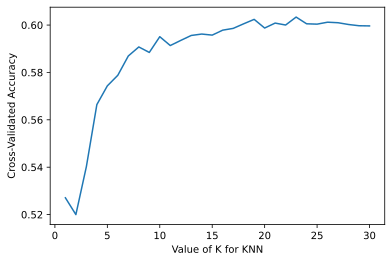

In [239]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [240]:
k_range = list(range(1, 100))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [241]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}


In [242]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [243]:
grid.fit(x, y);

In [244]:
grid.cv_results_

{'mean_fit_time': array([0.05581899, 0.08276858, 0.08816142, 0.08394237, 0.08730588,
        0.06464915, 0.08184521, 0.08163402, 0.08631449, 0.07825632,
        0.07501502, 0.08897808, 0.09051511, 0.0735033 , 0.08696361,
        0.08884437, 0.07654581, 0.0848408 , 0.08539307, 0.08897648,
        0.07918417, 0.07704999, 0.09322379, 0.0781755 , 0.09049172,
        0.09394872, 0.09023442, 0.07689416, 0.0885627 , 0.04510031,
        0.07155497, 0.08307254, 0.08368874, 0.08523903, 0.08686564,
        0.09497085, 0.09029775, 0.08028088, 0.10067747, 0.08104792,
        0.09198072, 0.1117384 , 0.07687936, 0.09623015, 0.09303875,
        0.08892117, 0.1035244 , 0.09357927, 0.07832575, 0.08268957,
        0.08614089, 0.07265675, 0.08787222, 0.09885788, 0.07702749,
        0.08764653, 0.08012269, 0.09233842, 0.09270372, 0.07703509,
        0.08662956, 0.09026613, 0.07436848, 0.08834419, 0.08869708,
        0.07502387, 0.08963661, 0.08884645, 0.08569362, 0.0873946 ,
        0.0866344 , 0.07816563,

In [245]:
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 23}
Best estimator:  KNeighborsClassifier(n_neighbors=23)
Best score:  0.6033764894719829


In [246]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [247]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [248]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [249]:
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 23, 'weights': 'uniform'}
Best estimator:  KNeighborsClassifier(n_neighbors=23)
Best score:  0.6033764894719829


In [250]:
knn = KNeighborsClassifier(n_neighbors=23, weights='uniform')
knn.fit(x, y)

knn.predict([[30,1 ,153 ,55,20,70 , 120,50,20,60, 200 ]])

array([3])

In [251]:
grid.predict([[21,1 ,160 ,80,20,70 , 50,50,20,40, 100]])

array([1])

In [439]:
lr = LogisticRegression()

In [395]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [410]:
y_pred_lr = log_regression.predict(X_test_scaled)

In [411]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
cnf_matrix

array([[531, 100,  40,  11],
       [116, 347, 132,  55],
       [ 26, 203, 293, 140],
       [  0,  12, 184, 489]], dtype=int64)

In [412]:
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       673
           1       0.53      0.52      0.53       662
           2       0.44      0.45      0.45       649
           3       0.71      0.70      0.71       695

    accuracy                           0.62      2679
   macro avg       0.62      0.62      0.62      2679
weighted avg       0.62      0.62      0.62      2679



In [413]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_l))

Accuracy: 0.6196341918626354


In [440]:
dt = DecisionTreeClassifier(max_depth=11)

In [385]:
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=11)

In [386]:
decisiontree.score(X_test_scaled, y_test)

0.6998880179171333

In [441]:
rf = RandomForestClassifier(n_estimators=300)

In [406]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=300)

In [415]:
y_pred_rf = randomforest.predict(X_test_scaled)

In [418]:
y_pred_rf

array([0, 3, 2, ..., 2, 3, 1])

In [419]:
y_test

10635    0
5496     3
13055    1
11826    1
1326     0
        ..
1472     2
8030     1
12738    3
9960     3
8545     1
Name: class, Length: 2679, dtype: int32

In [416]:
randomforest.score(X_test_scaled, y_test)

0.7566256065696155

In [417]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       621
           1       0.70      0.73      0.71       620
           2       0.65      0.64      0.64       670
           3       0.85      0.76      0.80       768

    accuracy                           0.76      2679
   macro avg       0.76      0.76      0.76      2679
weighted avg       0.76      0.76      0.76      2679



In [448]:
from sklearn.ensemble import StackingClassifier


In [449]:
estimators = [
    
    ('knn', KNeighborsClassifier(n_neighbors=7)),
    ('lr' ,LogisticRegression()),
    ('dt' ,DecisionTreeClassifier(max_depth=11)),
    ('rf' ,RandomForestClassifier(n_estimators=300))
]

In [450]:
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
 )

In [451]:
clf.fit(X_train_scaled, y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=7)),
                               ('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier(max_depth=11)),
                               ('rf',
                                RandomForestClassifier(n_estimators=300))],
                   final_estimator=LogisticRegression())

In [458]:
y_pred_clf = clf.predict(X_test_scaled)

In [460]:
y_trained_clf = clf.predict(X_train_scaled)

In [461]:
print(classification_report(y_trained_clf,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2667
           1       1.00      1.00      1.00      2702
           2       1.00      1.00      1.00      2683
           3       1.00      1.00      1.00      2662

    accuracy                           1.00     10714
   macro avg       1.00      1.00      1.00     10714
weighted avg       1.00      1.00      1.00     10714



In [455]:
print(classification_report(y_pred_clf,y_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       638
           1       0.68      0.73      0.71       603
           2       0.64      0.62      0.63       684
           3       0.84      0.77      0.80       754

    accuracy                           0.75      2679
   macro avg       0.75      0.76      0.75      2679
weighted avg       0.75      0.75      0.75      2679

